Train model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
path = '/content/drive/MyDrive/Fresh_Fruit_Detection/Dataset'
img_size = 50
category = ['fresh_apple', 'rotten_apple']
data = []

In [ ]:
for i in category:
    path_folder = os.path.join(path, i)
    class_num = category.index(i)

    for img in tqdm(os.listdir(path_folder)):
        try:
            img_arr = cv2.imread(os.path.join(path_folder, img), cv2.IMREAD_GRAYSCALE)
            pre_img_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([pre_img_arr, class_num])
        except:
            pass

100%|██████████| 1045/1045 [00:03<00:00, 289.29it/s]


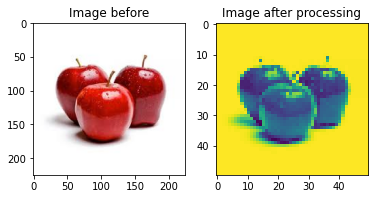

In [ ]:
plt.subplot(1,2,1)

img_ex = cv2.imread(os.path.join(path, 'fresh_apple', '17.jpg'))
img_rgb = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Image before')


plt.subplot(1,2,2)

plt.imshow(data[0][0])
plt.title('Image after processing')
plt.show()

In [ ]:
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X/255.0
y = np.array(y)

In [ ]:
len(X)

2115

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
print(X[0])

[[[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]]


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train_val.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(128))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_val, y_train_val, batch_size=32, epochs=5, validation_split=0.3)

Epoch 1/5
37/37 [==============================] - 7s 158ms/step - loss: 0.6912 - accuracy: 0.5372 - val_loss: 0.6901 - val_accuracy: 0.5492
Epoch 2/5
37/37 [==============================] - 5s 147ms/step - loss: 0.6481 - accuracy: 0.6140 - val_loss: 0.6295 - val_accuracy: 0.6161
Epoch 3/5
37/37 [==============================] - 5s 148ms/step - loss: 0.5449 - accuracy: 0.7289 - val_loss: 0.6025 - val_accuracy: 0.6791
Epoch 4/5
37/37 [==============================] - 6s 149ms/step - loss: 0.4578 - accuracy: 0.7973 - val_loss: 0.4297 - val_accuracy: 0.7913
Epoch 5/5
37/37 [==============================] - 5s 147ms/step - loss: 0.3330 - accuracy: 0.8590 - val_loss: 0.3052 - val_accuracy: 0.8720


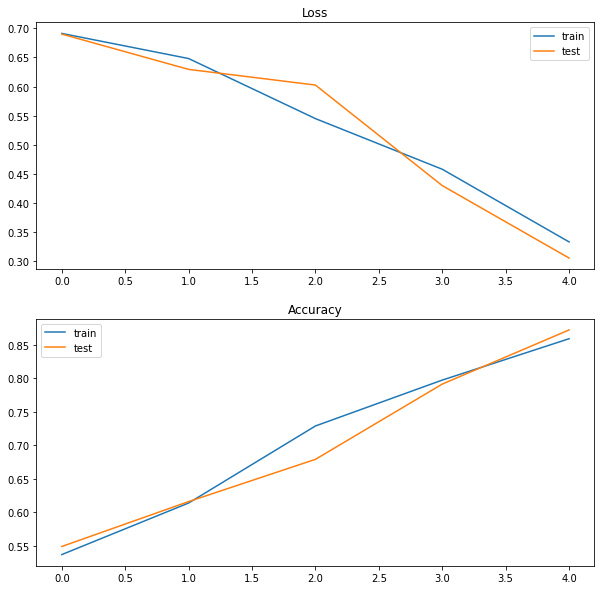

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
model.save('fresh_fruit_cnn')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation_16 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 activation_17 (Activation)  (None, 22, 22, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                 

Test model

In [ ]:
results = model.evaluate(X_test, y_test)

14/14 [==============================] - 1s 35ms/step - loss: 0.3209 - accuracy: 0.8652


In [ ]:
results

[0.3209322690963745, 0.8652482032775879]

In [ ]:
result_model = []
for img_test, label_test in zip(X_test, y_test):
    prediction = model.predict(np.expand_dims(img_test,axis=0))
    guess = 'fresh'
    if prediction[0][0] >= 0.5:
        guess = 'rotten'

    result_model.append(['fresh' if label_test < 0.5 else 'rotten', guess])



1/1 [==============================] - 0s 22ms/step


In [ ]:
doc = pd.DataFrame(result_model, columns=['Thực tế', 'Dự đoán'])
doc.head(100)

,Thực tế,Dự đoán
0,rotten,rotten
1,fresh,fresh
2,rotten,rotten
3,rotten,rotten
4,fresh,rotten
...,...,...
95,rotten,rotten
96,fresh,fresh
97,fresh,fresh
98,fresh,fresh
